<a href="https://colab.research.google.com/github/SUVARNATV/CognoRise-Infotech/blob/Machine-Learning-Projects/Emoji_prediction_cognorise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CognoRise_InfoTech/Machine Learning/Mapping.csv')
df

,Unnamed: 0,emoticons,number
0,0,😜,0
1,1,📸,1
2,2,😍,2
3,3,😂,3
4,4,😉,4
5,5,🎄,5
6,6,📷,6
7,7,🔥,7
8,8,😘,8
9,9,❤,9


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,emoticons,number
0,😜,0
1,📸,1
2,😍,2
3,😂,3
4,😉,4
5,🎄,5
6,📷,6
7,🔥,7
8,😘,8
9,❤,9


In [ ]:
df['emoticons'].value_counts()

,count
emoticons,
😜,1
📸,1
💜,1
😊,1
😎,1
💕,1
💙,1
✨,1
☀,1


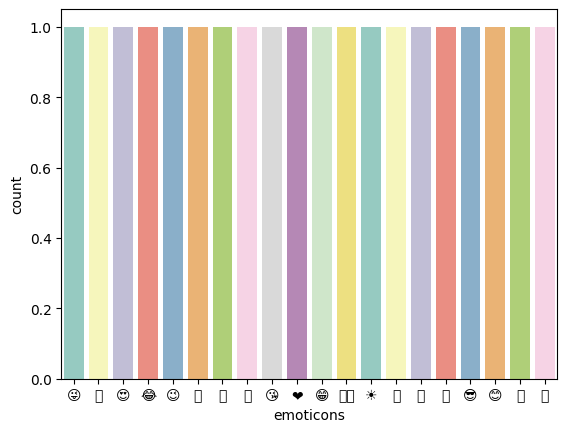

In [ ]:
sns.countplot(x=df['emoticons'],palette='Set3')
plt.show()

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/CognoRise_InfoTech/Machine Learning/Train.csv')
train

,Unnamed: 0,TEXT,Label
0,0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,2,Been friends since 7th grade. Look at us now w...,2
3,3,This is what it looks like when someone loves ...,3
4,4,RT @user this white family was invited to a Bl...,3
...,...,...,...
69995,69995,"Yes, I call Galina ""my Bubie"" Go follow my bea...",3
69996,69996,"I SEA you, Seattle @ Ballard Seafood Festival\n",16
69997,69997,If one of my daughters is wearing this and ask...,2
69998,69998,Guess who whoop people on THEIR homecoming?! #...,3


In [ ]:
train.drop(['Unnamed: 0'],axis=1,inplace=True)
train

,TEXT,Label
0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,Been friends since 7th grade. Look at us now w...,2
3,This is what it looks like when someone loves ...,3
4,RT @user this white family was invited to a Bl...,3
...,...,...
69995,"Yes, I call Galina ""my Bubie"" Go follow my bea...",3
69996,"I SEA you, Seattle @ Ballard Seafood Festival\n",16
69997,If one of my daughters is wearing this and ask...,2
69998,Guess who whoop people on THEIR homecoming?! #...,3


In [ ]:
train.head()

,TEXT,Label
0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,Been friends since 7th grade. Look at us now w...,2
3,This is what it looks like when someone loves ...,3
4,RT @user this white family was invited to a Bl...,3


In [ ]:
train.tail()

,TEXT,Label
69995,"Yes, I call Galina ""my Bubie"" Go follow my bea...",3
69996,"I SEA you, Seattle @ Ballard Seafood Festival\n",16
69997,If one of my daughters is wearing this and ask...,2
69998,Guess who whoop people on THEIR homecoming?! #...,3
69999,We Love you Robbie @ Heritage Memorial Cemeter...,14


In [ ]:
train.isna().sum()

,0
TEXT,0
Label,0


In [ ]:
train.dtypes

,0
TEXT,object
Label,int64


In [ ]:
train['Label'].value_counts()

,count
Label,
9,15091
2,7076
3,6842
7,4363
15,3843
13,3250
16,2832
17,2751
1,2592


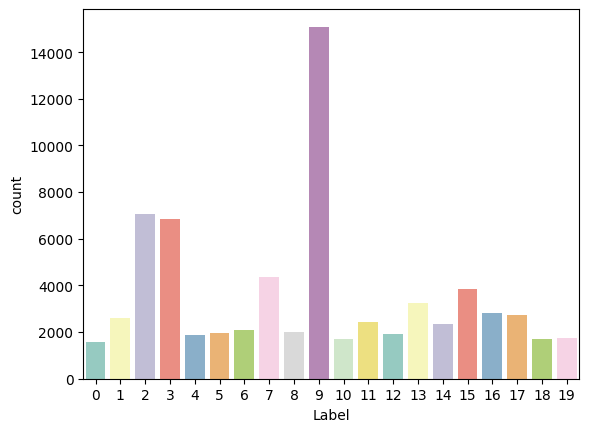

In [ ]:
sns.countplot(x=train['Label'],palette='Set3')
plt.show()

In [ ]:
train=train.sample(frac=1)
number9_df=train.loc[train['Label']==9][:7076]
train=train[train.Label!=9]
train=pd.concat([train,number9_df])
train=train.sample(frac=1)
train.reset_index(drop=True,inplace=True)
train

,TEXT,Label
0,CREAM.Cookies Rule Everything Around Me.This r...,2
1,Had the best time EVER recording my first full...,17
2,"Aztec print skirt, size large, $12 Purchase in...",7
3,My two little princesses #Christmas2016 @ Geor...,9
4,"I'm hungry. zoo_cell @ Wisconsin Rapids, Wisco...",1
...,...,...
61980,My baby got some new shoes #cummins #diesellif...,16
61981,My favorite age is now!! #29 @ Villa Azur\n,13
61982,Please do . New @user tops just in time for #v...,17
61983,Happy 4th of July! #4thofjuly #happy4thofjuly ...,11


In [ ]:
train['Label'].value_counts()

,count
Label,
2,7076
9,7076
3,6842
7,4363
15,3843
13,3250
16,2832
17,2751
1,2592


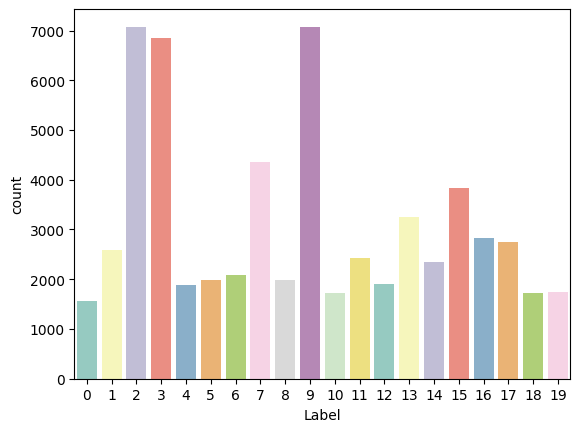

In [ ]:
sns.countplot(x=train['Label'],palette='Set3')
plt.show()

In [ ]:
df1=pd.merge(train,df,left_on='Label',right_on='number',how='left')
df1.drop(['Label','number'],axis=1,inplace=True)
df1

,TEXT,emoticons
0,CREAM.Cookies Rule Everything Around Me.This r...,😍
1,Had the best time EVER recording my first full...,😊
2,"Aztec print skirt, size large, $12 Purchase in...",🔥
3,My two little princesses #Christmas2016 @ Geor...,❤
4,"I'm hungry. zoo_cell @ Wisconsin Rapids, Wisco...",📸
...,...,...
61980,My baby got some new shoes #cummins #diesellif...,😎
61981,My favorite age is now!! #29 @ Villa Azur\n,✨
61982,Please do . New @user tops just in time for #v...,😊
61983,Happy 4th of July! #4thofjuly #happy4thofjuly ...,🇺🇸


In [ ]:
test=pd.read_csv('/content/drive/MyDrive/CognoRise_InfoTech/Machine Learning/Test.csv')
test

,Unnamed: 0,id,TEXT
0,0,0,Thought this was cool...#Repost (get_repost)・・...
1,1,1,Happy 4th! Corte madera parade. #everytownusa ...
2,2,2,Luv. Or at least something close to it. @ Unio...
3,3,3,There's a slice of pie under that whipped crea...
4,5,5,#thankyou for your thank you We adore you both...
...,...,...,...
25953,7493,29993,"Rest In Peace, Nana. thanks for playing cards ..."
25954,7494,29994,"I jus wan EAT #chowtime #swt30 @ Hartford, Con..."
25955,7495,29995,Playing Bloon SuperMonkey 2 #bloonsupermonkey2...
25956,7498,29998,Best Snow-cone I've EVER had!!! #bahamabucks #...


In [ ]:
test.drop(['Unnamed: 0','id'],axis=1,inplace=True)
test

,TEXT
0,Thought this was cool...#Repost (get_repost)・・...
1,Happy 4th! Corte madera parade. #everytownusa ...
2,Luv. Or at least something close to it. @ Unio...
3,There's a slice of pie under that whipped crea...
4,#thankyou for your thank you We adore you both...
...,...
25953,"Rest In Peace, Nana. thanks for playing cards ..."
25954,"I jus wan EAT #chowtime #swt30 @ Hartford, Con..."
25955,Playing Bloon SuperMonkey 2 #bloonsupermonkey2...
25956,Best Snow-cone I've EVER had!!! #bahamabucks #...


In [ ]:
test.head()

,TEXT
0,Thought this was cool...#Repost (get_repost)・・...
1,Happy 4th! Corte madera parade. #everytownusa ...
2,Luv. Or at least something close to it. @ Unio...
3,There's a slice of pie under that whipped crea...
4,#thankyou for your thank you We adore you both...


In [ ]:
test.tail()

,TEXT
25953,"Rest In Peace, Nana. thanks for playing cards ..."
25954,"I jus wan EAT #chowtime #swt30 @ Hartford, Con..."
25955,Playing Bloon SuperMonkey 2 #bloonsupermonkey2...
25956,Best Snow-cone I've EVER had!!! #bahamabucks #...
25957,You making my life better is just part of your...


In [ ]:
test.isna().sum()

,0
TEXT,0


In [ ]:
test.dtypes

,0
TEXT,object


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk import SnowballStemmer
ss=SnowballStemmer('english')
sw=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
train_text=train.TEXT
train_text

,TEXT
0,CREAM.Cookies Rule Everything Around Me.This r...
1,Had the best time EVER recording my first full...
2,"Aztec print skirt, size large, $12 Purchase in..."
3,My two little princesses #Christmas2016 @ Geor...
4,"I'm hungry. zoo_cell @ Wisconsin Rapids, Wisco..."
...,...
61980,My baby got some new shoes #cummins #diesellif...
61981,My favorite age is now!! #29 @ Villa Azur\n
61982,Please do . New @user tops just in time for #v...
61983,Happy 4th of July! #4thofjuly #happy4thofjuly ...


In [ ]:
def clean(text):
  text=str(text).lower()
  text=re.sub('[^a-z0-9]+',' ',text)
  text=[ss.stem(word)for word in text.split(' ') if(word not in sw) and len(word)>=3]
  text=' '.join(text)
  return text
train_text=train_text.apply(clean)
train_text

,TEXT
0,cream cooki rule everyth around red velvet coo...
1,best time ever record first full product demo ...
2,aztec print skirt size larg purcha store email...
3,two littl princess christmas2016 georgetown on...
4,hungri zoo cell wisconsin rapid wisconsin
...,...
61980,babi got new shoe cummin diesellif dailydiesel...
61981,favorit age villa azur
61982,plea new user top time valentinesday spiritual...
61983,happi 4th juli 4thofjuli happy4thofjuli indepe...


In [ ]:
test_text=test.TEXT
test_text

,TEXT
0,Thought this was cool...#Repost (get_repost)・・...
1,Happy 4th! Corte madera parade. #everytownusa ...
2,Luv. Or at least something close to it. @ Unio...
3,There's a slice of pie under that whipped crea...
4,#thankyou for your thank you We adore you both...
...,...
25953,"Rest In Peace, Nana. thanks for playing cards ..."
25954,"I jus wan EAT #chowtime #swt30 @ Hartford, Con..."
25955,Playing Bloon SuperMonkey 2 #bloonsupermonkey2...
25956,Best Snow-cone I've EVER had!!! #bahamabucks #...


In [ ]:
test_text=test_text.apply(clean)
test_text

,TEXT
0,thought cool repost get repost colorview shay ...
1,happi 4th cort madera parad everytownusa meric...
2,luv least someth close union hill richmond vir...
3,slice pie whip cream houseofpi hous pie
4,thankyou thank ador plan moreeee host wed
...,...
25953,rest peac nana thank play card lynn massachusett
25954,jus wan eat chowtim swt30 hartford connecticut
25955,play bloon supermonkey bloonsupermonkey2 bloon...
25956,best snow cone ever bahamabuck youhavetotryit


In [ ]:
#vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
x_train=vec.fit_transform(train_text)
x_test=vec.transform(test_text)
print(x_train)

  (0, 56807)	0.1010440466615103
  (0, 22056)	0.1767630052861558
  (0, 46571)	0.3213149262436802
  (0, 57208)	0.36063932123789544
  (0, 44476)	0.24390968277525396
  (0, 3769)	0.24648310727047068
  (0, 17780)	0.2477650610401905
  (0, 45993)	0.32890823507150174
  (0, 12525)	0.5945043812425088
  (0, 13032)	0.286341529189694
  (1, 36951)	0.24500132060151825
  (1, 5653)	0.4808319795146237
  (1, 37579)	0.28866907453416485
  (1, 14576)	0.4048690127549956
  (1, 43219)	0.3203984635710422
  (1, 20521)	0.2741443863587697
  (1, 19055)	0.22039020258089329
  (1, 44455)	0.3141393263026558
  (1, 17733)	0.24683044007447383
  (1, 54591)	0.1869464141542615
  (1, 6253)	0.2014604244788664
  (2, 48260)	0.41849911486295865
  (2, 17107)	0.32837712290226106
  (2, 51057)	0.259680194328421
  (2, 43572)	0.2997234056741114
  :	:
  (61981, 18529)	0.3040561888031264
  (61982, 50209)	0.5143476693255676
  (61982, 32663)	0.4959594731295705
  (61982, 56980)	0.47279308567991135
  (61982, 42325)	0.3057265090780416
  (61982

In [ ]:
print(x_test)

  (0, 54363)	0.33985234219541405
  (0, 47920)	0.4986739068432698
  (0, 44828)	0.5601730671085946
  (0, 26343)	0.422029903641032
  (0, 21263)	0.21883478214282318
  (0, 12543)	0.309891841747013
  (1, 41538)	0.40538341986303944
  (1, 40892)	0.3595735334491457
  (1, 34960)	0.32949966082195936
  (1, 33335)	0.4700942455481243
  (1, 23497)	0.18260093520360735
  (1, 12694)	0.5114116235717031
  (1, 1142)	0.2862299434062046
  (2, 57564)	0.31918328547318026
  (2, 56510)	0.35722499333118923
  (2, 49699)	0.32922493812529935
  (2, 45132)	0.4038212741278095
  (2, 33075)	0.38864067295065297
  (2, 31043)	0.3777188627563719
  (2, 24599)	0.29778375956286424
  (2, 11723)	0.3415602050581514
  (3, 59007)	0.3817308242281554
  (3, 49057)	0.41365756818787414
  (3, 41908)	0.7188337167775867
  (3, 25363)	0.24547481058130466
  :	:
  (25953, 53233)	0.19887732389046367
  (25953, 44898)	0.360421505297536
  (25953, 42279)	0.28368576641044646
  (25953, 41279)	0.35753591302064486
  (25953, 37500)	0.4355064569799886
  (

In [ ]:
y_train=train['Label']
y_train

,Label
0,2
1,17
2,7
3,9
4,1
...,...
61980,16
61981,13
61982,17
61983,11


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier()
rand.fit(x_train,y_train)
y_pred=rand.predict(x_test)
y_pred

array([16, 11,  2, ...,  3,  2,  9])

In [ ]:
output=pd.DataFrame({'TEXT':test_text,'Label':y_pred})
output=pd.merge(output,df,left_on='Label',right_on='number',how='left')
result=output.drop(['number','Label'],axis=1)
result

,TEXT,emoticons
0,thought cool repost get repost colorview shay ...,😎
1,happi 4th cort madera parad everytownusa meric...,🇺🇸
2,luv least someth close union hill richmond vir...,😍
3,slice pie whip cream houseofpi hous pie,😍
4,thankyou thank ador plan moreeee host wed,❤
...,...,...
25953,rest peac nana thank play card lynn massachusett,❤
25954,jus wan eat chowtim swt30 hartford connecticut,❤
25955,play bloon supermonkey bloonsupermonkey2 bloon...,😂
25956,best snow cone ever bahamabuck youhavetotryit,😍


In [ ]:
pred=rand.predict(x_test[23497])
num=pred[0]
emoji=df.loc[(df['number'])==num].values[0][0]
emoji

'💕'